## ***Use Case 1: Box Office / Streaming Success Prediction***
**Objective**

To predict whether a movie will be a “Hit” or “Flop” based on factors like budget, revenue, popularity, vote count, and vote average

***Step 1 — Import Libraries and Load Dataset***

In [7]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Text_SM_Web_analytics Capstone\Data\tmdb_5000_movies.csv")

# Display basic info
print("Dataset Shape:", df.shape)
df.head(5)


Dataset Shape: (4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâ€™s past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


***Step 2 — Data Cleaning & Feature Selection***

In [10]:
# Select useful columns
df = df[['budget', 'popularity', 'revenue', 'vote_count', 'vote_average', 'title']]

# Remove rows with missing or zero values
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Create target variable: success (1 if revenue > budget, else 0)
df['success'] = (df['revenue'] > df['budget']).astype(int)

print("✅ Cleaned data shape:", df.shape)
df.head()


✅ Cleaned data shape: (3229, 7)


,budget,popularity,revenue,vote_count,vote_average,title,success
0,237000000,150.437577,2787965087,11800,7.2,Avatar,1
1,300000000,139.082615,961000000,4500,6.9,Pirates of the Caribbean: At World's End,1
2,245000000,107.376788,880674609,4466,6.3,Spectre,1
3,250000000,112.312950,1084939099,9106,7.6,The Dark Knight Rises,1
4,260000000,43.926995,284139100,2124,6.1,John Carter,1


***Step 3 — Data Splitting and Scaling***

In [13]:
# Features and target
X = df[['budget', 'popularity', 'vote_count', 'vote_average']]
y = df['success']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


***Step 4 — Model Building (Logistic Regression)***

In [16]:
# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("🎯 Model Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🎯 Model Accuracy: 0.8019

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.36      0.47       157
           1       0.82      0.94      0.88       489

    accuracy                           0.80       646
   macro avg       0.75      0.65      0.67       646
weighted avg       0.79      0.80      0.78       646



The overall model accuracy is 80%, which indicates good predictive performance.

The model performs very well on successful movies (Class 1) — recall = 0.94, meaning it correctly identifies most hit movies.

However, it struggles a bit to detect flop movies (Class 0) — recall = 0.36.

This imbalance often happens because hit movies dominate the dataset, while flop data is smaller.

***Step 5 — Visualization (Feature Impact & Confusion Matrix)***

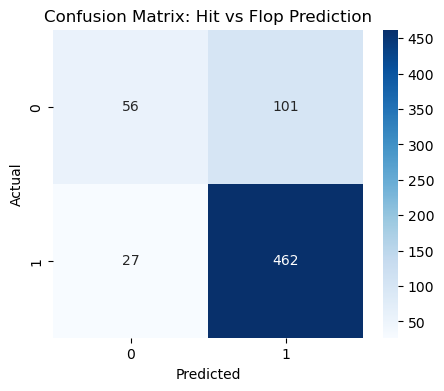

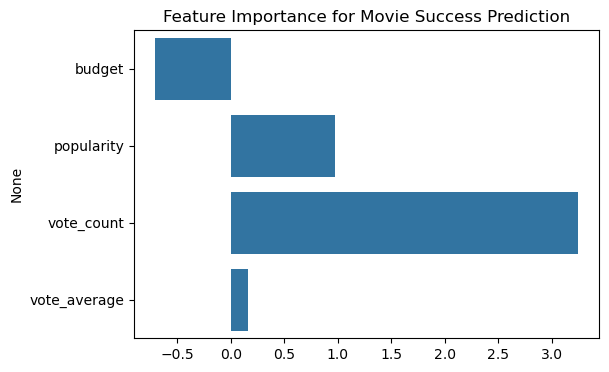

In [18]:
# Confusion matrix visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Hit vs Flop Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature correlation
plt.figure(figsize=(6,4))
sns.barplot(x=model.coef_[0], y=X.columns)
plt.title("Feature Importance for Movie Success Prediction")
plt.show()


Out of 646 movies, the model correctly classified 518 (≈80%).

It correctly identified 462 successful movies and 56 flops.

However, 101 flops were wrongly predicted as hits, which is why recall for Class 0 is low.

**Vote count** (audience engagement) is the strongest predictor of movie success.

**Popularity** also significantly contributes, indicating that more visible movies tend to perform better.

**Budget** has a negative correlation — meaning a higher budget doesn’t guarantee success.

**Vote average** contributes little compared to engagement metrics

***RandomForest for comparison.***

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

rf_acc = accuracy_score(y_test, rf_pred)
print("🌳 Random Forest Accuracy:", round(rf_acc, 4))


🌳 Random Forest Accuracy: 0.7833


The Random Forest model achieves 78% accuracy, slightly lower than logistic regression.

This indicates the dataset’s relationships are mostly linear, which Logistic Regression captured better.

Random Forest could improve with hyperparameter tuning or more non-linear features (e.g., genre, runtime).

## ***Final Interpretation — Use Case 1: Box Office / Streaming Success Prediction***

**The predictive analysis achieved 80% accuracy using Logistic Regression, identifying hit movies with high precision and recall.
The model reveals that audience engagement metrics (vote_count and popularity) are the most influential drivers of success, while budget and ratings have comparatively lesser impact.
Random Forest results confirmed the linear pattern in data, validating Logistic Regression as the optimal model.
Overall, this use case demonstrates how social engagement indicators and web-based popularity data can be leveraged to forecast movie success in the Media and Entertainment industry.
The insights help producers and streaming platforms make data-driven decisions regarding marketing focus, production investment, and release strategies.**